In [9]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as  plt 


In [3]:
#Loading the Data sets
data=pd.read_csv("customer_churn.csv")

In [10]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part one: Data Manipulation

In [7]:
# Extracting the 5th column
customer_5=data.iloc[:,4]

In [14]:
customer_5.head()

0    No
1    No
2    No
3    No
4    No
Name: StreamingMovies, dtype: object

In [15]:
c_5=data.loc[:,['Dependents']]

In [19]:
c_5.head()

,Dependents
0,No
1,No
2,No
3,No
4,No


In [18]:
customer_5.head()

0    No
1    No
2    No
3    No
4    No
Name: StreamingMovies, dtype: object

In [12]:
# Extracting the 15th column
customer_15=data.iloc[:,14]

In [17]:
customer_15.head()

0    No
1    No
2    No
3    No
4    No
Name: StreamingMovies, dtype: object

In [22]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [27]:
senior_male_electronic=data[(data['gender']=='Male')&(data['SeniorCitizen']==1)&(data['PaymentMethod']=='Electronic check')]


In [28]:
senior_male_electronic.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No


In [29]:
senior_male_electronic.shape

(298, 21)

In [30]:
#TENURE >70 M or Monthly charges  >100

customer_total_tenure=data[(data['tenure']>70)| (data['MonthlyCharges']>100)]

In [31]:
customer_total_tenure.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


In [32]:
customer_total_tenure=data[(data['tenure']>70) & (data['MonthlyCharges']>100)]

In [33]:
customer_total_tenure.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
17,9959-WOFKT,Male,0,No,Yes,71,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7382.25,No
59,5954-BDFSG,Female,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),107.50,7853.7,No
94,9848-JQJTX,Male,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),100.90,7459.05,No
106,6728-DKUCO,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,One year,Yes,Electronic check,104.15,7303.05,No
193,9680-NIAUV,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),109.70,8129.3,No


In [35]:
customer_total_tenure.shape

(175, 21)

In [37]:
#Contract of two years, payment method mailed , checked , churn =Yes
c_churn_two=data[(data['Contract']=='Two year')&(data['PaymentMethod']=='Mailed check')&(data['Churn']=='Yes')]

In [39]:
c_churn_two.shape

(3, 21)

In [40]:
c_random=data.sample(n=333)

In [41]:
c_random.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2630,0014-BMAQU,Male,0,Yes,No,63,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8,No
442,0206-TBWLC,Female,0,Yes,No,54,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,114.65,6049.5,No
6543,8050-XGRVL,Female,0,Yes,Yes,62,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Credit card (automatic),54.75,3425.35,No
6048,9253-QXKBE,Male,1,Yes,No,29,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.45,2653.65,Yes
7019,9710-NJERN,Female,0,No,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826,No


In [42]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [43]:
data['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

## Part two B. Data Vizualization for the Project


In [45]:
#Pass the Internet Service Column
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

Text(0.5, 1.0, 'Distribution of Internet Services')

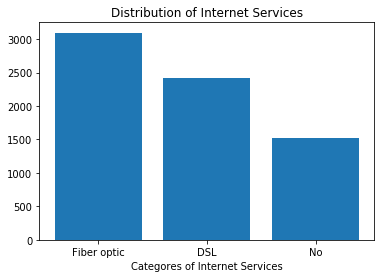

In [54]:
x=data['InternetService'].value_counts().keys().tolist()
y=data['InternetService'].value_counts().tolist()
plt.bar(x,y)
plt.xlabel("Categores of Internet Services")
plt.title("Distribution of Internet Services")

In [49]:
x

['Fiber optic', 'DSL', 'No']

In [51]:
y

[3096, 2421, 1526]

Text(0.5, 1.0, 'Distribution of internet service')

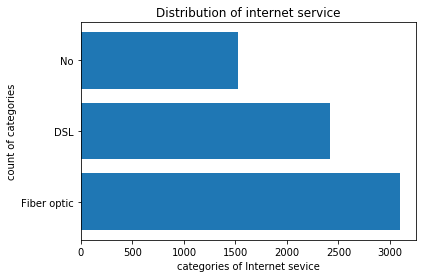

In [55]:
 x=data['InternetService'].value_counts().keys().tolist()
y=data['InternetService'].value_counts().tolist()
plt.barh(x,y)
plt.xlabel("categories of Internet sevice")
plt.ylabel("count of categories")
plt.title("Distribution of internet service")

## Histogram

Text(0.5, 1.0, 'Distribution of Tenure')

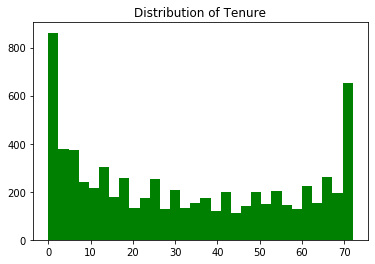

In [58]:
# Histogram

plt.hist(data['tenure'], color='green', bins=30)
plt.title('Distribution of Tenure')

# Scatter Plot

Text(0.5, 1.0, 'Tenure vs Monthly Charges')

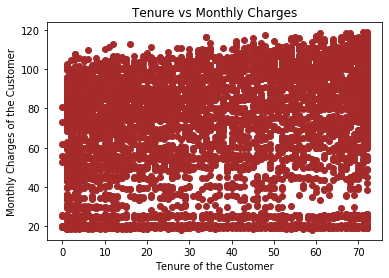

In [60]:
plt.scatter(x=data['tenure'], y=data['MonthlyCharges'],color='brown')
plt.xlabel('Tenure of the Customer')
plt.ylabel('Monthly Charges of the Customer')
plt.title('Tenure vs Monthly Charges')

# BoxPlot


C:\Users\chala\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


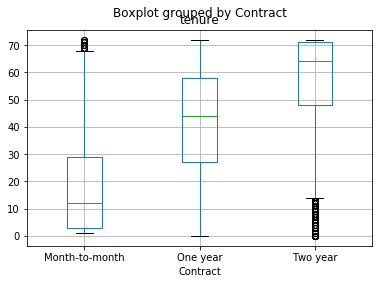

In [61]:
data.boxplot(column='tenure', by ='Contract')

In [62]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


# Simple Linear Regression Model

In [159]:
from sklearn import linear_model  # imported the needed packages
from sklearn.model_selection import train_test_split
import numpy as np

In [160]:

 x=pd.DataFrame(data['tenure'])  # independent variable
y=pd.DataFrame(data['MonthlyCharges'])  # dependent variable


In [161]:
x.head()

,tenure
0,1
1,34
2,2
3,45
4,2


In [162]:
y.head()

,MonthlyCharges
0,29.85
1,56.95
2,53.85
3,42.30
4,70.70


In [163]:
# Split the data(70:30 ratio)

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=0)


In [164]:
x.shape

(7043, 1)

In [167]:
y.shape

(7043, 1)

In [165]:
x_train.shape

(4930, 1)

In [168]:
y_train.shape

(4930, 1)

In [166]:
x_test.shape


(2113, 1)

In [80]:
y_test.shape


(2113, 1)

In [169]:
from sklearn .linear_model import LinearRegression

In [170]:
regressor=LinearRegression()

In [171]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [172]:
y_pred=regressor.predict(x_test)

In [173]:
y_pred # Predicted one 

array([[60.95089608],
       [72.98096699],
       [59.1903979 ],
       ...,
       [75.62171426],
       [70.63363608],
       [65.6455579 ]])

In [174]:
y_test.head()  # the Actual Value

,MonthlyCharges
2200,58.20
4627,116.60
3225,71.95
2828,20.45
3768,77.75


In [175]:
#Effeiceny model valudation ( The difference between the actual and predicted--MSE)
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [176]:
rmse

29.394584027273893

In [177]:
# Simple Logistic Regression 

x=pd.DataFrame(data['tenure']) # indepdent  variable
y=pd.DataFrame( data['Churn']) # depdent variable


In [178]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.35,random_state=0)

In [179]:
from sklearn.linear_model import LogisticRegression

In [180]:
logic=LogisticRegression()

In [181]:
logic.fit(x_train, y_train) # train the model

C:\Users\chala\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chala\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [182]:
y_pred=logic.predict(x_test)

In [183]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [107]:
confusion_matrix(y_test,y_pred)

array([[1722,   93],
       [ 531,  120]], dtype=int64)

In [184]:
accuracy_score(y_test,y_pred)

0.7469586374695864

# Multiple Logistic Regression

In [185]:
# multiple  logistic regression
x=pd.DataFrame(data.loc[:,['MonthlyCharges','tenure']])  # independent variable
y=pd.DataFrame(data['Churn'])  # dependent variable

In [186]:
x.head()

,MonthlyCharges,tenure
0,29.85,1
1,56.95,34
2,53.85,2
3,42.30,45
4,70.70,2


In [187]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=0)

In [188]:
from sklearn.linear_model import LogisticRegression

In [189]:
logic.fit(x_train,y_train) # training the model

C:\Users\chala\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chala\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [190]:
y_pred=logic.predict(x_test)

In [191]:
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [194]:
y_test.head()

,Churn
2200,No
4627,No
3225,No
2828,No
3768,No


In [195]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [196]:
confusion_matrix(y_test,y_pred)

array([[1634,  181],
       [ 364,  287]], dtype=int64)

In [197]:
accuracy_score(y_test,y_pred) #73.6 %,multiple logistic regression it comes out to be 77.8%

0.7789943227899432

# Decision Tree Model


In [213]:
x=pd.DataFrame(data['tenure'])  # independent variable
y=pd.DataFrame(data['Churn'])  # dependent variable

In [214]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [207]:
from sklearn.tree import DecisionTreeClassifier # imported the algorthims

In [215]:
d_t=DecisionTreeClassifier()
d_t.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [216]:
y_pred=d_t.predict(x_test)

In [217]:
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [218]:
y_test.head()

,Churn
2200,No
4627,No
3225,No
2828,No
3768,No


In [219]:
confusion_matrix(y_test,y_pred)

array([[965,  76],
       [281,  87]], dtype=int64)

In [220]:
965+87

1052

In [221]:
281+76

357

In [222]:
accuracy_score(y_test,y_pred) #74.6%

0.7466288147622427

## Random Forest 

In [224]:
x=pd.DataFrame(data['tenure'])  # independent variable
y=pd.DataFrame(data['Churn'])  # dependent variable

In [225]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=0) # Split the Data

In [226]:
 from sklearn.ensemble import RandomForestClassifier

In [227]:
R_f= RandomForestClassifier(n_estimators=100)

In [228]:
R_f.fit(x_train, y_train)

C:\Users\chala\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [229]:
y_pred=R_f.predict(x_test)

In [231]:
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [233]:
y_test.head()

,Churn
2200,No
4627,No
3225,No
2828,No
3768,No


In [234]:
accuracy_score(y_test,y_pred) # 75.24%

0.7524846190250828

# Simple Logistic regression--------->73.6
#  Multiple logistic regression_------->77.8
# Decsion tree classfier----------> 74.6
# Random Forest Classfier -------->75.2

# According to the final model result analysis , Multiple regression algorthim provide a better performance than the other algorthims. 
